In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

In [7]:
diabetes = pd.read_csv('diabetes.csv')
diabetes

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [8]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]

X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

LogisticRegression()

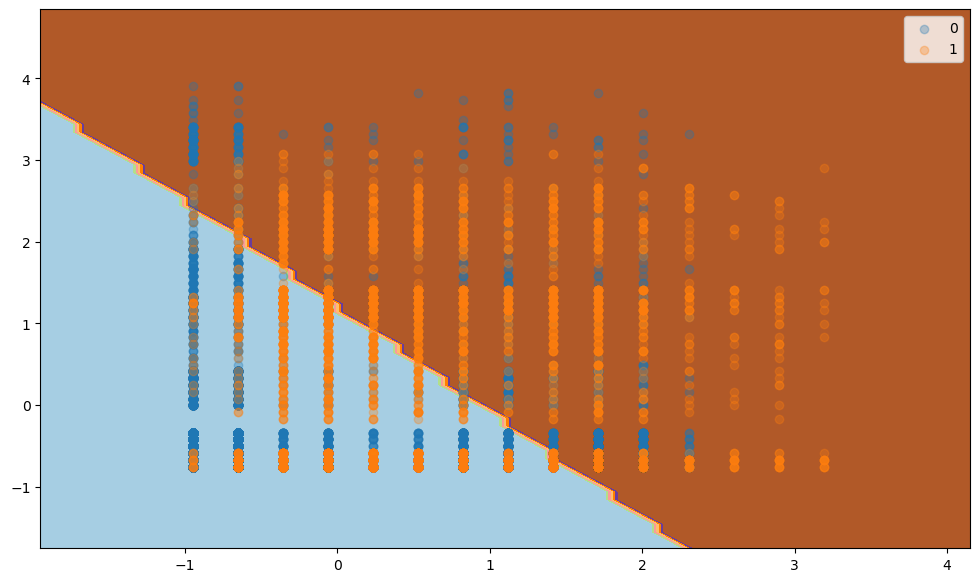

In [16]:
def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    xx, yy = meshgrid(x1grid, x2grid)

    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    grid = hstack((r1,r2))

    yhat = trained_model.predict(grid)

    zz = yhat.reshape(xx.shape)

    plt.contourf(xx, yy, zz, cmap='Paired')

    for class_value in range(2):

        row_ix = where(y_plot == class_value)

        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], alpha=0.3, label=class_value)

    plt.legend(loc='upper right')
    plt.show()

plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

In [12]:
predictions_lr_train = model_lr.predict(X_train_standardized)
predictions_lr = model_lr.predict(X_test_standardized)

print("F1_score train:", f1_score(y_train, predictions_lr_train))
print("F1_score test:", f1_score(y_test, predictions_lr))

F1_score train: 0.5468775476928094
F1_score test: 0.5809280233832663


In [14]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
model_lr_l1 = GridSearchCV(LogisticRegression(penalty='l1', solver="liblinear"), param_grid)
model_lr_l1.fit(X_train_standardized, y_train)

GridSearchCV(estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

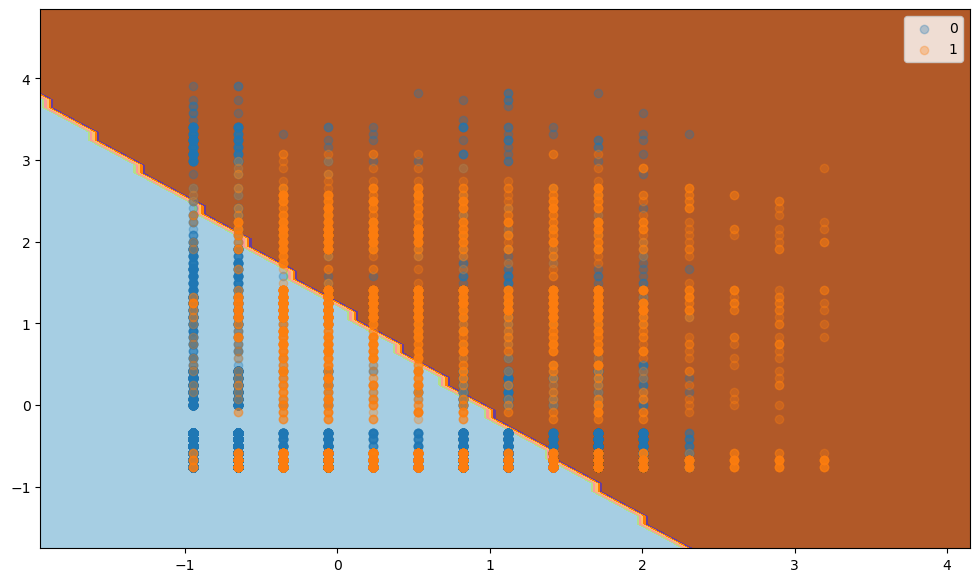

In [17]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_l1)

In [18]:
predictions_lr_l1_train = model_lr_l1.predict(X_train_standardized)
predictions_lr_l1 = model_lr_l1.predict(X_test_standardized)

print("F1_score train:", f1_score(y_train, predictions_lr_l1_train))
print("F1_score test:", f1_score(y_test, predictions_lr_l1))

F1_score train: 0.5464035230794324
F1_score test: 0.5772893772893773


In [19]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
model_lr_l2 = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)

model_lr_l2.fit(X_train_standardized, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

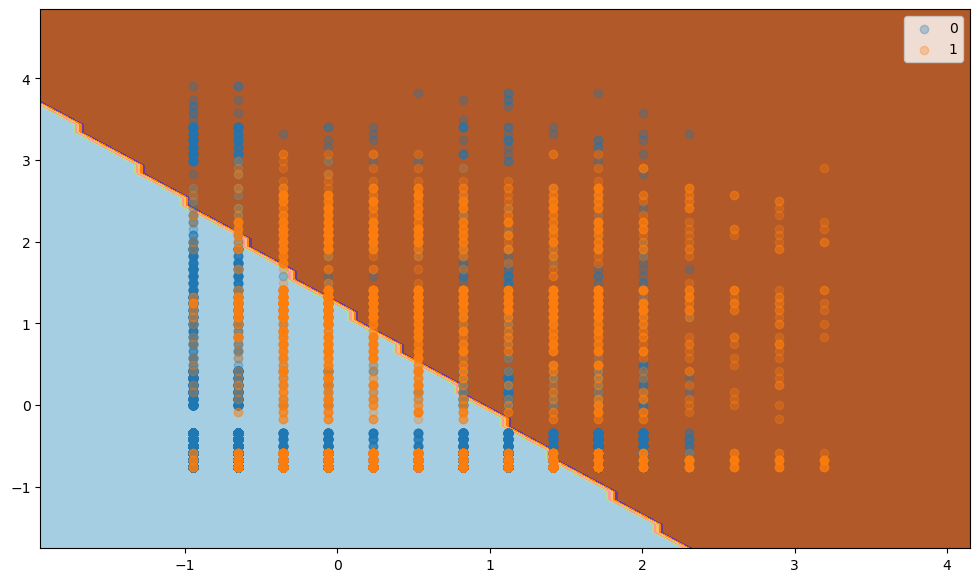

In [21]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_l2)

In [22]:
predictions_lr_l2_train = model_lr_l2.predict(X_train_standardized)
predictions_lr_l2 = model_lr_l2.predict(X_test_standardized)

print("F1_score train:", f1_score(y_train, predictions_lr_l2_train))
print("F1_score test:", f1_score(y_test, predictions_lr_l2))

F1_score train: 0.5464035230794324
F1_score test: 0.5772893772893773
